In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path += ["../","../data"]
from memfg.sampler import Sampler
from memfg.dsphdata import dSphData, dSphProp

In [2]:
dsphdata = dSphData("sample_photo.csv","sample_spec.csv")
dsphprop = dSphProp("Ursa Minor",distance=76000,distance_err=6000)

radial velocity err loaded.
<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (227.28541667, 67.2225, 76000.)>
distance_err = 6000


In [3]:
dsphdata.sc_spec.radial_velocity

<Quantity [-246.9 , -241.1 , -234.6 , -252.5 , -246.5 , -247.9 , -244.3 ,
           -244.2 ,  -16.7 , -236.1 , -238.8 , -246.9 , -245.3 , -242.8 ,
           -243.5 , -256.8 , -238.2 , -240.9 , -252.9 , -253.  , -268.  ,
             -1.3 ,  -83.8 ,  -52.8 , -259.2 , -243.3 , -236.8 , -251.3 ,
           -248.2 , -253.2 , -240.  , -258.7 , -247.4 , -239.9 , -249.8 ,
           -245.8 , -249.4 , -236.2 , -252.3 , -245.2 , -240.7 , -402.6 ,
           -254.4 , -254.9 , -248.1 , -244.3 , -236.1 , -251.9 , -243.4 ,
            -56.6 , -239.9 , -231.  , -233.4 , -235.4 , -248.3 , -246.8 ,
           -249.9 , -265.6 , -238.4 , -256.8 , -254.6 , -126.2 , -259.2 ,
           -222.8 , -235.  , -246.8 , -243.3 , -246.7 , -262.7 , -241.  ,
           -243.  ,  -83.6 , -231.36, -245.5 , -244.1 , -252.2 , -275.5 ,
           -248.2 ,  -68.8 , -249.2 , -257.5 , -222.  , -237.6 ,   -5.2 ,
           -244.5 , -249.  , -112.5 , -257.5 ,  -65.6 , -244.5 , -240.1 ,
           -119.6 , -258.6 , -247.8 , 

In [4]:
from memfg import modki17
modki17.DEBUG = False
model = modki17.modKI17(dsphdata.to_sc("spec"),dsphprop.to_sc(),"Plummer","sample_paramlims.csv","sample_prior_norm.csv")

sc_obsdata has radial_velocity_err. Likelihood function is defined with velocity error:
[ 1.27  1.46  2.35  0.88  1.13  0.64  0.54  1.08  0.58  1.26  1.74  0.86
  0.82  0.93  0.54  0.37  1.38  1.93  0.73  0.59  0.79  0.6   0.52  0.49
  2.    1.29  1.87  1.69  0.55  0.87  1.36  2.5   2.33  1.38  0.51  0.6
  0.54  0.92  1.54  1.41  0.55  3.87  1.71  0.85  0.56  0.95  2.12  0.77
  1.56  0.52  2.2   0.96  1.96  0.5   2.18  1.14  1.22  1.41  1.    0.74
  0.58  3.81  1.35  0.59  0.51  1.78  1.37  0.51  2.73  1.    1.11  0.63
  0.5   1.42  1.96  0.7   1.14  1.6   0.64  1.23  0.5   1.23  2.01  0.5
  2.28  0.71  1.63  1.85  0.57  1.94  1.01  0.78  1.03  0.76  1.27  1.26
  0.78  1.08  0.49  0.65  1.44  0.75  0.63  0.73  2.19  0.51  1.3   0.57
  1.57  1.01  0.36  0.7   0.62  1.59  1.56  0.87  0.74  1.22  0.77  0.76
  0.56  2.07  0.92  2.    0.65  0.62  2.04  1.31  1.93  2.73  0.6   0.86
  1.54  1.81  1.13  1.45  2.04  1.3   0.7   0.6   0.9   0.96  2.12  0.75
  1.19  0.67  1.25  0.56  3.74  2.92  

generate_x_w in 1 inf 0.005 1000 1000


array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        3.13029144e-238, 1.76948327e-239, 9.85924217e-241]])

array([5.16956966])

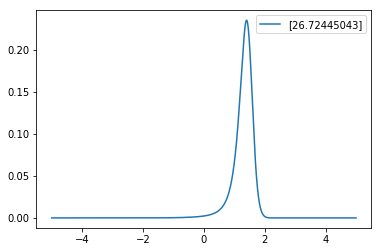

In [5]:
model.dsph.sigmalos_dequad(R_pc=[10],show_fig=True)

In [15]:
model.is_parameters_in_domain([300,2.0,0.0,0.0,
                               2.5,0.0,2.0,5.0,0.5,
                               0.0,
                               -250,0,0,100,100,0.501,80e3])
#model.n_components

True

In [6]:
sampler = Sampler("photo",dsphdata,dsphprop,"exp2d",["re_pc","odds","dra0","dde0"],[100,1,-1e-2,-1e-2],[200,5,1e-2,1e-2])

In [7]:
sampler.run_mcmc_epoch("test.csv",n_burnin=200,n_run=100,n_epoch=5)

4 th Sampling: 100%|██████████| 100/100 [00:02<00:00, 37.07it/s]


In [5]:
sampler.wbic_run_mcmc_epoch("test_wbic.csv",n_burnin=200,n_run=100,n_epoch=5)

4 th WBIC Sampling: 100%|██████████| 100/100 [00:20<00:00,  4.81it/s]


,re_pc,odds,dra0,dde0,lnpost
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,157.261026,1.737233,-0.016844,0.007668,-244212.312196
std,4.874218,0.073331,0.011552,0.004538,1.387937
min,140.249098,1.489529,-0.058557,-0.006504,-244222.889938
25%,153.865250,1.688256,-0.024723,0.004619,-244212.999497
50%,157.197527,1.738598,-0.016070,0.007779,-244212.007158
75%,160.650314,1.786935,-0.008776,0.010683,-244211.309004
max,174.989178,2.018892,0.033432,0.023206,-244210.351177


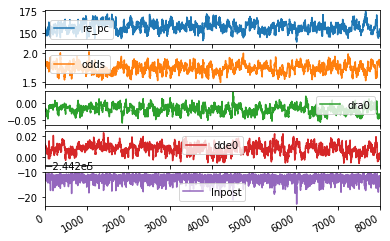

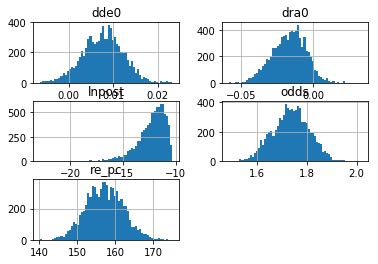

In [8]:
import pandas as pd
df = pd.read_csv("test.csv")
df.plot(subplots=True)
df.hist(bins=64)
df.describe()

,re_pc,odds,dra0,dde0,lngenpost,lnlike
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,159.493049,1.718542,-0.018224,0.007305,-25255.840374,-244229.798693
std,16.809716,0.252466,0.036774,0.013208,1.414384,13.677422
min,101.380327,1.038592,-0.135855,-0.043337,-25265.523026,-244323.432174
25%,147.815197,1.534754,-0.043918,-0.001442,-25256.561436,-244236.771535
50%,158.196339,1.692282,-0.018808,0.005976,-25255.506585,-244226.570883
75%,170.310926,1.892936,0.007251,0.016137,-25254.797849,-244219.717243
max,218.294024,2.855736,0.095643,0.051843,-25253.855269,-244210.602273


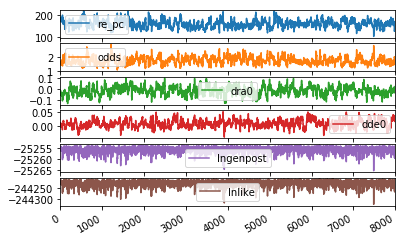

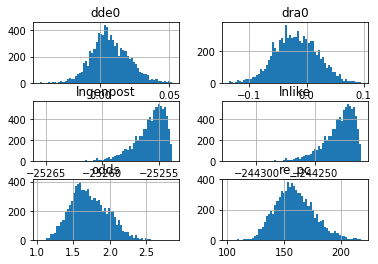

In [9]:
df_wbic = pd.read_csv("test_wbic.csv")
df_wbic.plot(subplots=True)
df_wbic.hist(bins=64)
df_wbic.describe()

In [6]:
_seed_lim = pd.read_csv("paramlims.csv",index_col=0)
_width = _seed_lim.prms_max - _seed_lim.prms_min
seed_lim_lo = _seed_lim.mean(axis=1) - 1e-3*_width
seed_lim_hi = _seed_lim.mean(axis=1) + 1e-3*_width
seed_lim_lo

re_pc                   249.5000
odds                    499.0000
dra0                     -0.0002
dde0                     -0.0002
log10_rs_pc               2.4950
log10_rhos_Msunpc3       -0.0080
a                         1.7475
b                         6.4930
g                         0.5988
mlog10_1manib            -0.0020
vmem                   -250.1000
vfg0                  -4511.0000
vfg1                  -4511.0000
dvfg0                   499.0000
dvfg1                   499.0000
sfg0                      0.4990
dist                  75970.0000
dtype: float64

In [33]:
sampler = Sampler("spec",dsphdata,dsphprop,"Plummer",
                  _seed_lim.index,
                  seed_lim_lo.values,seed_lim_hi.values,
                  paramlims_fname="paramlims.csv",
                  prior_norm_fname="prior_norm.csv")

sc_obsdata has radial_velocity_err. Likelihood function is defined with velocity error:
[ 1.27  1.46  2.35  0.88  1.13  0.64  0.54  1.08  0.58  1.26  1.74  0.86
  0.82  0.93  0.54  0.37  1.38  1.93  0.73  0.59  0.79  0.6   0.52  0.49
  2.    1.29  1.87  1.69  0.55  0.87  1.36  2.5   2.33  1.38  0.51  0.6
  0.54  0.92  1.54  1.41  0.55  3.87  1.71  0.85  0.56  0.95  2.12  0.77
  1.56  0.52  2.2   0.96  1.96  0.5   2.18  1.14  1.22  1.41  1.    0.74
  0.58  3.81  1.35  0.59  0.51  1.78  1.37  0.51  2.73  1.    1.11  0.63
  0.5   1.42  1.96  0.7   1.14  1.6   0.64  1.23  0.5   1.23  2.01  0.5
  2.28  0.71  1.63  1.85  0.57  1.94  1.01  0.78  1.03  0.76  1.27  1.26
  0.78  1.08  0.49  0.65  1.44  0.75  0.63  0.73  2.19  0.51  1.3   0.57
  1.57  1.01  0.36  0.7   0.62  1.59  1.56  0.87  0.74  1.22  0.77  0.76
  0.56  2.07  0.92  2.    0.65  0.62  2.04  1.31  1.93  2.73  0.6   0.86
  1.54  1.81  1.13  1.45  2.04  1.3   0.7   0.6   0.9   0.96  2.12  0.75
  1.19  0.67  1.25  0.56  3.74  2.92  

In [34]:
sampler.run_mcmc_epoch('test_spec.csv',nwalkers=64)



Burn in:   0%|          | 0/1000 [00:00<?, ?it/s]

Burn in:   0%|          | 1/1000 [00:02<44:08,  2.65s/it]

Burn in:   0%|          | 2/1000 [00:04<37:36,  2.26s/it]

Burn in:   0%|          | 3/1000 [00:05<33:29,  2.02s/it]

Burn in:   0%|          | 4/1000 [00:06<30:45,  1.85s/it]

Burn in:   0%|          | 5/1000 [00:08<29:11,  1.76s/it]

Burn in:   1%|          | 6/1000 [00:09<26:59,  1.63s/it]

Burn in:   1%|          | 7/1000 [00:11<25:53,  1.56s/it]

Burn in:   1%|          | 8/1000 [00:12<24:49,  1.50s/it]

Burn in:   1%|          | 9/1000 [00:13<24:21,  1.47s/it]

Burn in:   1%|          | 10/1000 [00:15<24:07,  1.46s/it]

Burn in:   1%|          | 11/1000 [00:16<24:36,  1.49s/it]

Burn in:   1%|          | 12/1000 [00:18<24:55,  1.51s/it]

Burn in:   1%|▏         | 13/1000 [00:19<24:31,  1.49s/it]

Burn in:   1%|▏         | 14/1000 [00:21<24:44,  1.51s/it]

Burn in:   2%|▏         | 15/1000 [00:23<25:08,  1.53s/it]

Burn in:   2%|▏         | 16/1000 [00:24<24:20,  1.48s/i

In [6]:
%load_ext autoreload
%autoreload 2
from memfg.jfactor import Jfactor,Jfactor_v02
chain = pd.read_csv("test_spec.csv")[-2:-1:1]
for arg in ["rhos_Msunpc3","rs_pc"]:
    chain[arg] = chain["log10_"+arg]
chain_arglogj = chain[["rhos_Msunpc3","rs_pc","a","b","g","dist"]]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
np.log10(Jfactor_v02(*chain_arglogj.T.values))

array([12.17035211])

generate_x_w in -1 1 0.5 10 10


array([[2.69664203e-143, 1.13180487e-103, 1.00935267e-079,
        2.82159122e-065, 1.36849714e-056, 2.15905830e-051,
        2.66176377e-048, 1.62597701e-046, 6.08367247e-046,
        1.17316090e-047, 2.75699804e-051, 4.01397712e-054,
        1.25904783e-055, 7.30506638e-057, 1.04243916e-058,
        8.39115288e-062, 5.31779813e-067, 1.09643255e-075,
        3.92220928e-090, 4.39804213e-114]])

array([[ 12.17035211],
       [-35.62716473]])

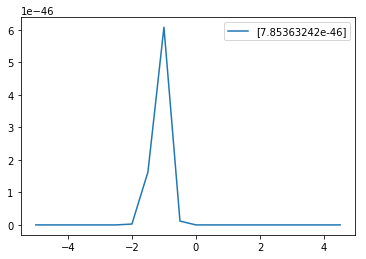

In [18]:
np.log10(Jfactor(*chain_arglogj.T.values,return_relerr=True,width=5e-1,pN=10,mN=10))

generate_x_w in -1 1 0.05 100 100


array([[2.69664203e-144, 2.22411631e-139, 1.05362022e-134, ...,
        1.14455456e-140, 4.09422705e-145, 8.64261806e-150]])

array([[ 12.17035211],
       [-35.64737966]])

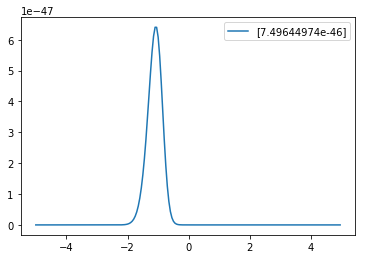

In [19]:
np.log10(Jfactor(*chain_arglogj.T.values,return_relerr=True,width=5e-2,pN=100,mN=100))

array([[2.15905830e-53, 2.36509957e-53, 2.58957983e-53, ...,
        1.10147090e-63, 1.00645317e-63, 9.19200219e-64]])

array([[ 12.17035211],
       [-35.64737979]])

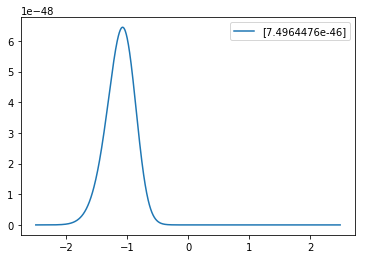

In [20]:
np.log10(Jfactor(*chain_arglogj.T.values,return_relerr=True,width=5e-3,pN=500,mN=500))